In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('yt_videos_for_train_labeled.db')
query = "SELECT * FROM videos"
df = pd.read_sql_query(query, conn)
conn.close()

In [3]:
df

,profession,video_id,channel_id,video_title,video_description
0,AI-тренер,NV8ltedGIs0,UC16MFrwfYJdVqejUgXJI3nw,"Различие между Искусственным Интеллектом, Маши...",Сегодня очень часто встречаются термины Искусс...
1,AI-тренер,n0elzqks1B0,UCfw5jkUkJEdXt9A1EY9H61A,Искусственный интеллект и нейронные сети,Про нейронные сети простыми словами.
2,AI-тренер,2_qpghfynRk,UCa8e_N1ZTo_102eIsmtprLw,&quot;AI в медицине: как искусственный интелле...,Использование искусственного интеллекта (ИИ ил...
3,AI-тренер,y7bf0Kk46UU,UCFTNoZYjkg-3LZTHrHfV1nQ,"Введение в искусственный интеллект. Quo Vadis,...",Занятие ведёт Михаил Бурцев. --- Deep Learning...
4,AI-тренер,F7eunXbk8U4,UCRO1Eaz36h23rX03iPOaqMw,Искусственный интеллект: быстрый старт с нуля....,Первое занятие. Обзорная лекция «Искусственный...
...,...,...,...,...,...
62154,Реставратор,cU27UwBfoxI,UClcUonYVfUwc7QqlpSA3q9g,Детский стульчик из СССР. Реставрация,от_и_до #детский_стульчик #СССР #реставрация #...
62155,Реставратор,luRym6BQYhs,UCEyDTHa7Pu6lMTtGFfN_JBA,Способы окрашивания мебели. Реставрация мебели...,Все части мастер-класса по реставрации мебели ...
62156,Реставратор,oDbn4EAHKjI,UCs3O_T9cFTmxnwRB4zRdNFA,Реставрация ванны жидким акрилом (часть 1),
62157,Реставратор,BHKZtcZ-guw,UCvbU1-oQSBS5d5f7oQJSDgA,"Реставрация советского шкафа, антресоли","Денег на новый шкаф нет, решила отреставрирова..."


In [4]:
import matplotlib.pyplot as plt

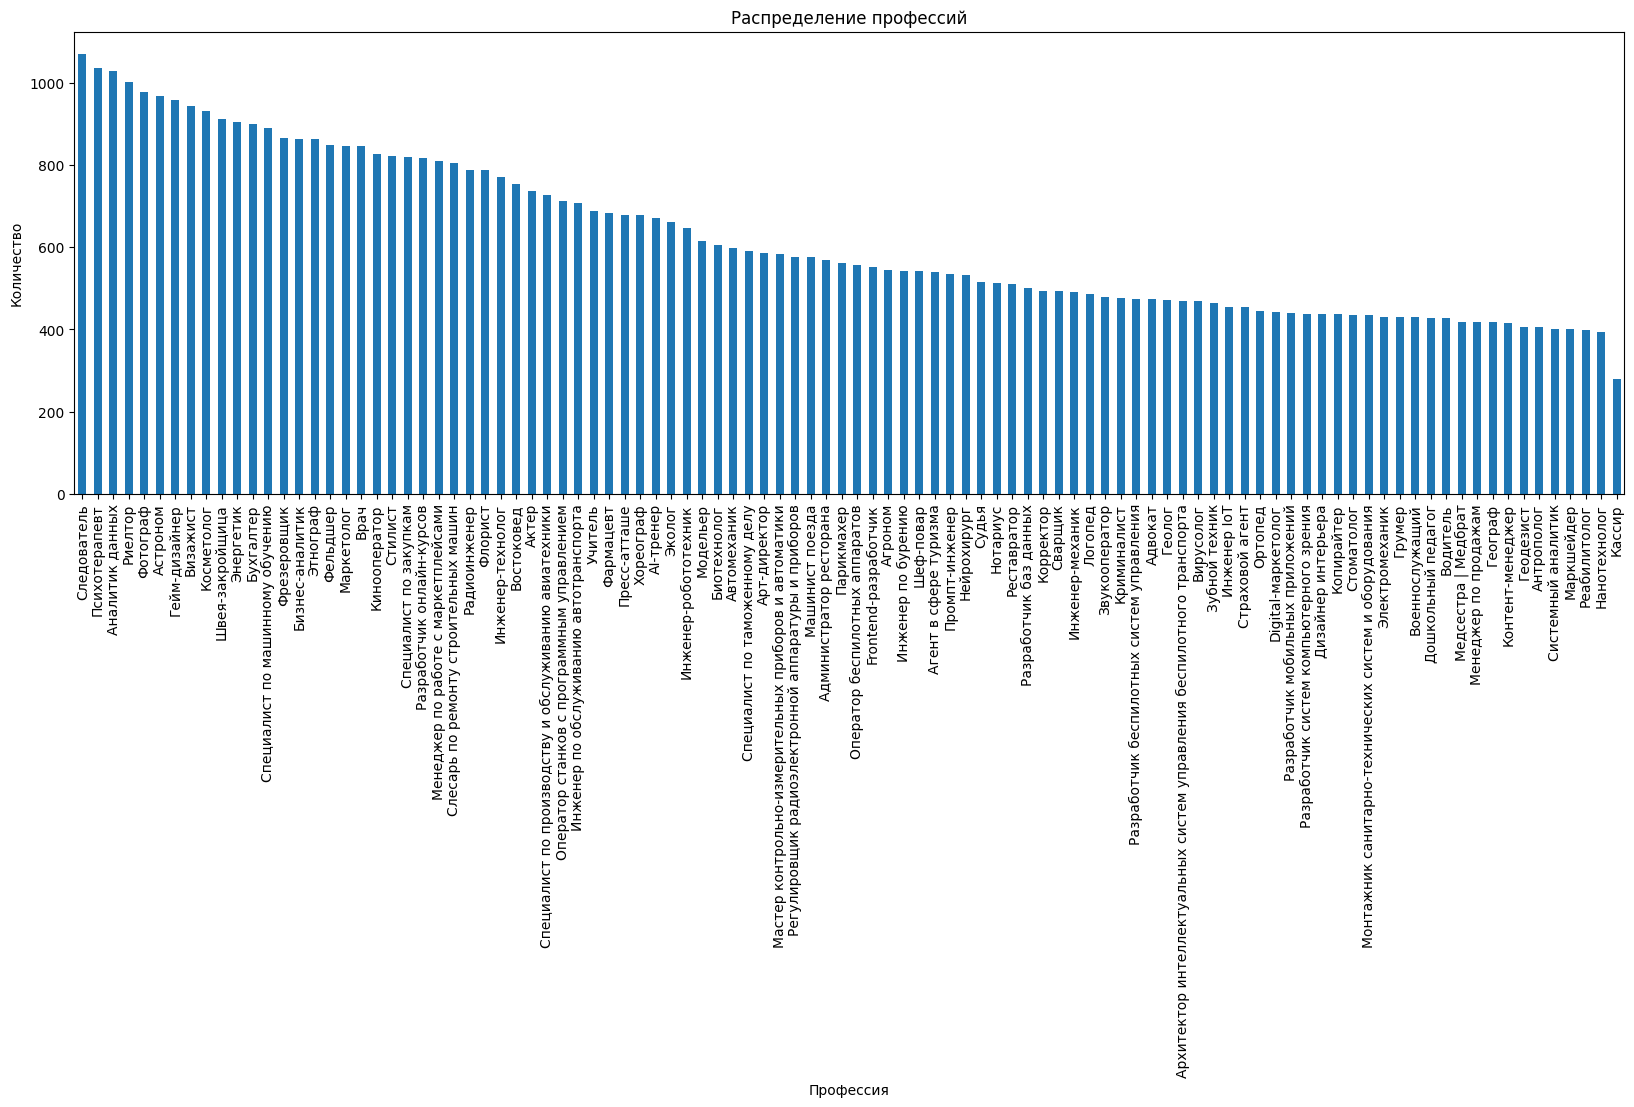

In [5]:
# Подсчет вхождений каждой профессии
profession_counts = df['profession'].value_counts()

# Построение гистограммы с увеличенными размерами
plt.figure(figsize=(20, 6))
profession_counts.plot(kind='bar')
plt.xlabel('Профессия')
plt.ylabel('Количество')
plt.title('Распределение профессий')
plt.show()

In [10]:
# Функция для проверки, является ли слово русским (без английских букв)
def is_russian_word(word):
    return re.match("^[а-яА-ЯёЁ]+$", word) is not None

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Облако слов для профессии: Следователь


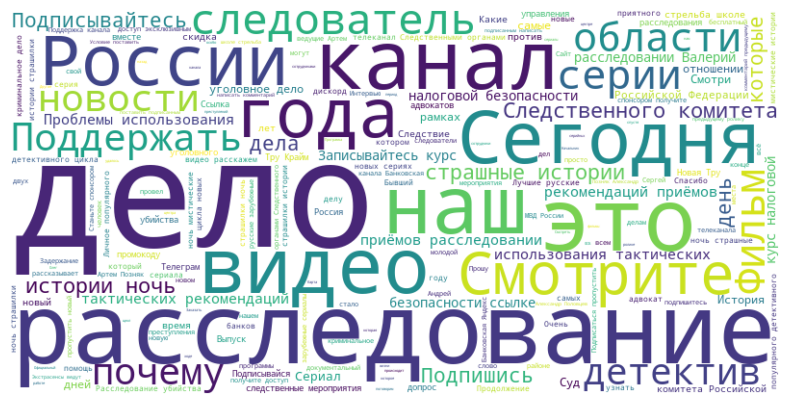

Облако слов для профессии: Психотерапевт


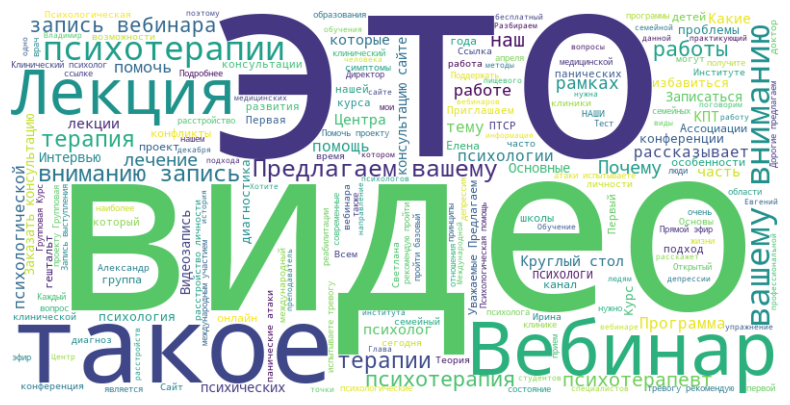

Облако слов для профессии: Аналитик данных


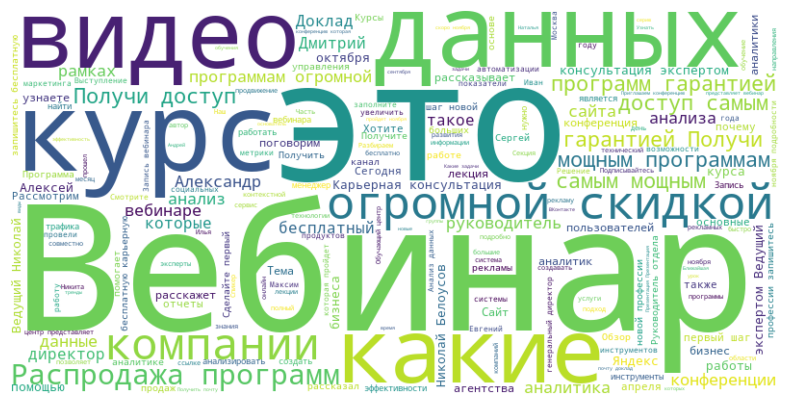

Облако слов для профессии: Риелтор


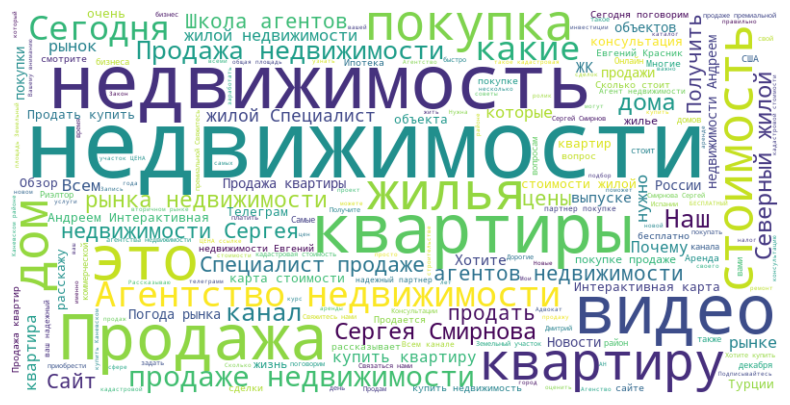

Облако слов для профессии: Фотограф


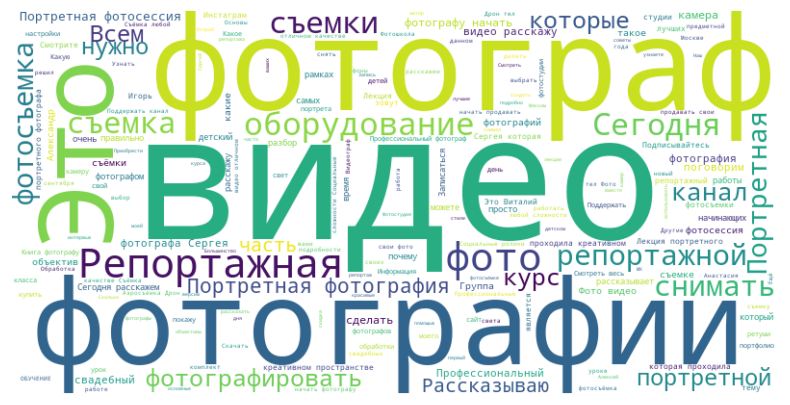

In [11]:
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import re

# Подсчитываем популярность профессий
profession_counts = df['profession'].value_counts()

# Выбираем пять самых популярных профессий
top_professions = profession_counts.nlargest(5).index.tolist()

# Собираем описания для каждой из топ-5 профессий
descriptions = {profession: " ".join(df[df['profession'] == profession]['video_description'].tolist()) 
                for profession in top_professions}

# Загружаем стоп-слова (необходимо сначала загрузить пакет стоп-слов для nltk)
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))

# Функция для создания облака слов с удалением английских слов
def create_wordcloud(text, stop_words):
    # Фильтрация текста, удаление стоп-слов и английских слов
    filtered_words = [word for word in text.split() if word.lower() not in stop_words and is_russian_word(word)]
    filtered_text = " ".join(filtered_words)

    # Создание облака слов
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Генерируем и отображаем облака слов для каждой профессии
for profession, text in descriptions.items():
    print(f"Облако слов для профессии: {profession}")
    create_wordcloud(text, russian_stopwords)